In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Crop_recommendation.csv')

In [3]:
print('The shape of dataset of ',data.shape)

The shape of dataset of  (2200, 8)


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Compute the means of numeric columns
means = numeric_data.mean()

# Print the means
for feature, mean in means.items():
    print(f"The mean of {feature} is {mean:.2f}")


The mean of N is 50.55
The mean of P is 53.36
The mean of K is 48.15
The mean of temperature is 25.62
The mean of humidity is 71.48
The mean of ph is 6.47
The mean of rainfall is 103.46


In [8]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    z = data.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
        print('Minimum', i, 'required', x[i].min())
        print('Average', i, 'required', x[i].mean())
        print('Maximum', i, 'required', x[i].max())
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [9]:
@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']):
    # for condition in conditions:
        print(f"Average value for {conditions}:")
        grouped = data.groupby('label')[conditions].mean()
        for label, average in grouped.items():
            print(f"  {label}: {average:.2f}")
        print("--------------------------------------------")

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'r…

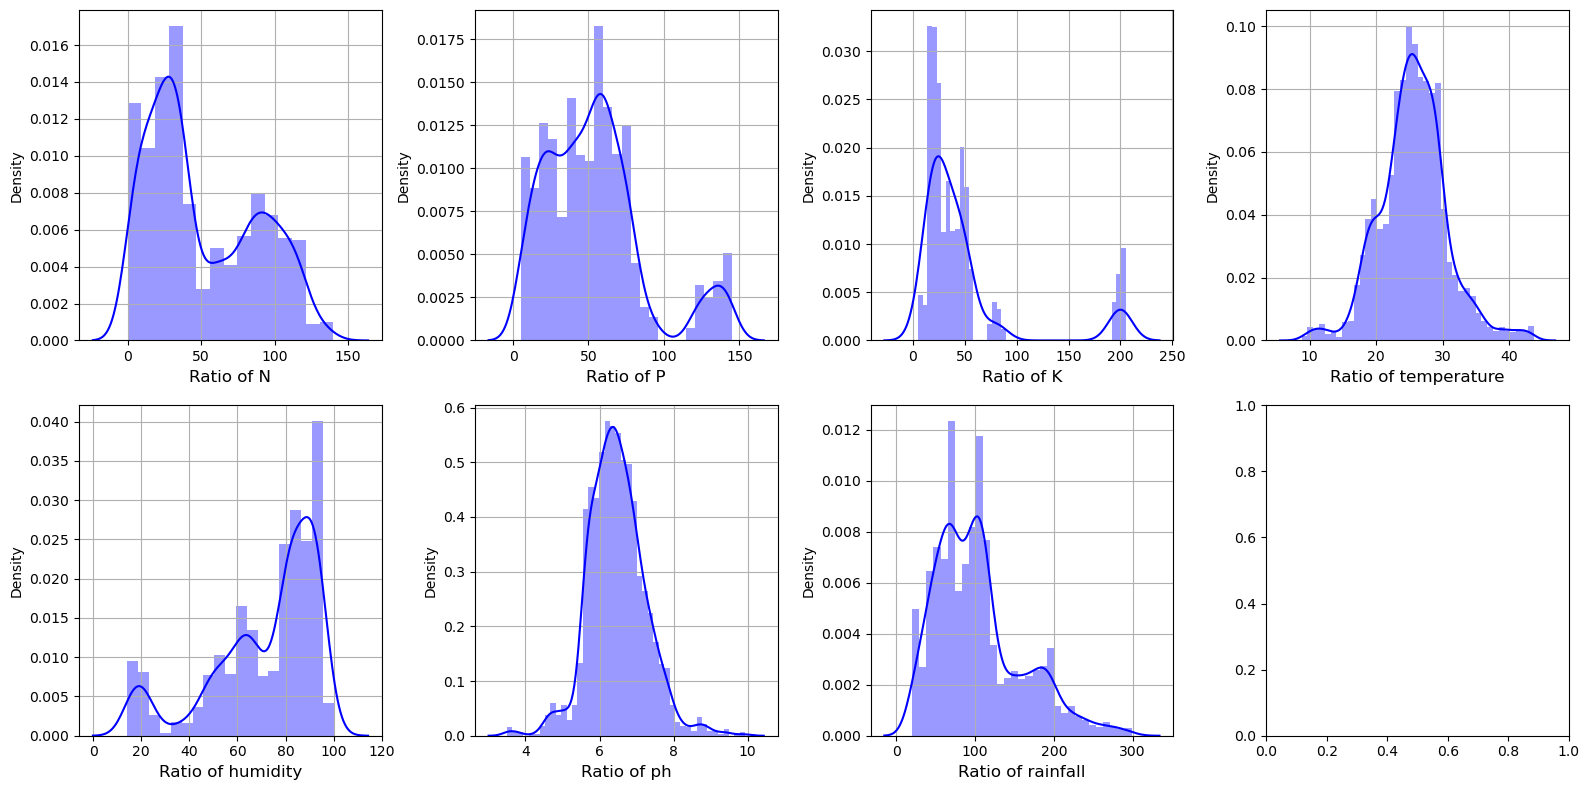

In [10]:
# Define the features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create subplots for each feature
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Iterate over the features
for i, feature in enumerate(features):
    # Select the current subplot
    plt.subplot(2, 4, i+1)

    # Plot the distribution plot
    sns.distplot(data[feature], color='blue')

    # Set x-label and grid for the subplot
    plt.xlabel(f'Ratio of {feature}', fontsize=12)
    plt.grid()

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show() 


In [11]:
print('crops which require a very high ratio of Nitrogen content in soil:', data[data['N'] > 120]['label'].unique())
print('crops which require a very high ratio of Phosphorus content in soil:', data[data['P'] > 100]['label'].unique())
print('crops which require a very high ratio of Potassium content in soil:', data[data['K'] > 200]['label'].unique())
print('crops which require very high rainfall:', data[data['rainfall'] > 200]['label'].unique())
print('crops which require very low temperature:', data[data['temperature'] < 10]['label'].unique())
print('crops which require very high temperature:', data[data['temperature'] > 40]['label'].unique())
print('crops which require very low humidity:', data[data['humidity'] < 20]['label'].unique())
print('crops which require very low pH:', data[data['ph'] < 4]['label'].unique())
print('crops which require very high pH:', data[data['ph'] > 9]['label'].unique())


crops which require a very high ratio of Nitrogen content in soil: ['cotton']
crops which require a very high ratio of Phosphorus content in soil: ['grapes' 'apple']
crops which require a very high ratio of Potassium content in soil: ['grapes' 'apple']
crops which require very high rainfall: ['rice' 'papaya' 'coconut']
crops which require very low temperature: ['grapes']
crops which require very high temperature: ['grapes' 'papaya']
crops which require very low humidity: ['chickpea' 'kidneybeans']
crops which require very low pH: ['mothbeans']
crops which require very high pH: ['mothbeans']


In [12]:
print('Summer Crops:', data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print('Winter Crops:', data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print('Rainy Crops:', data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())
     

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


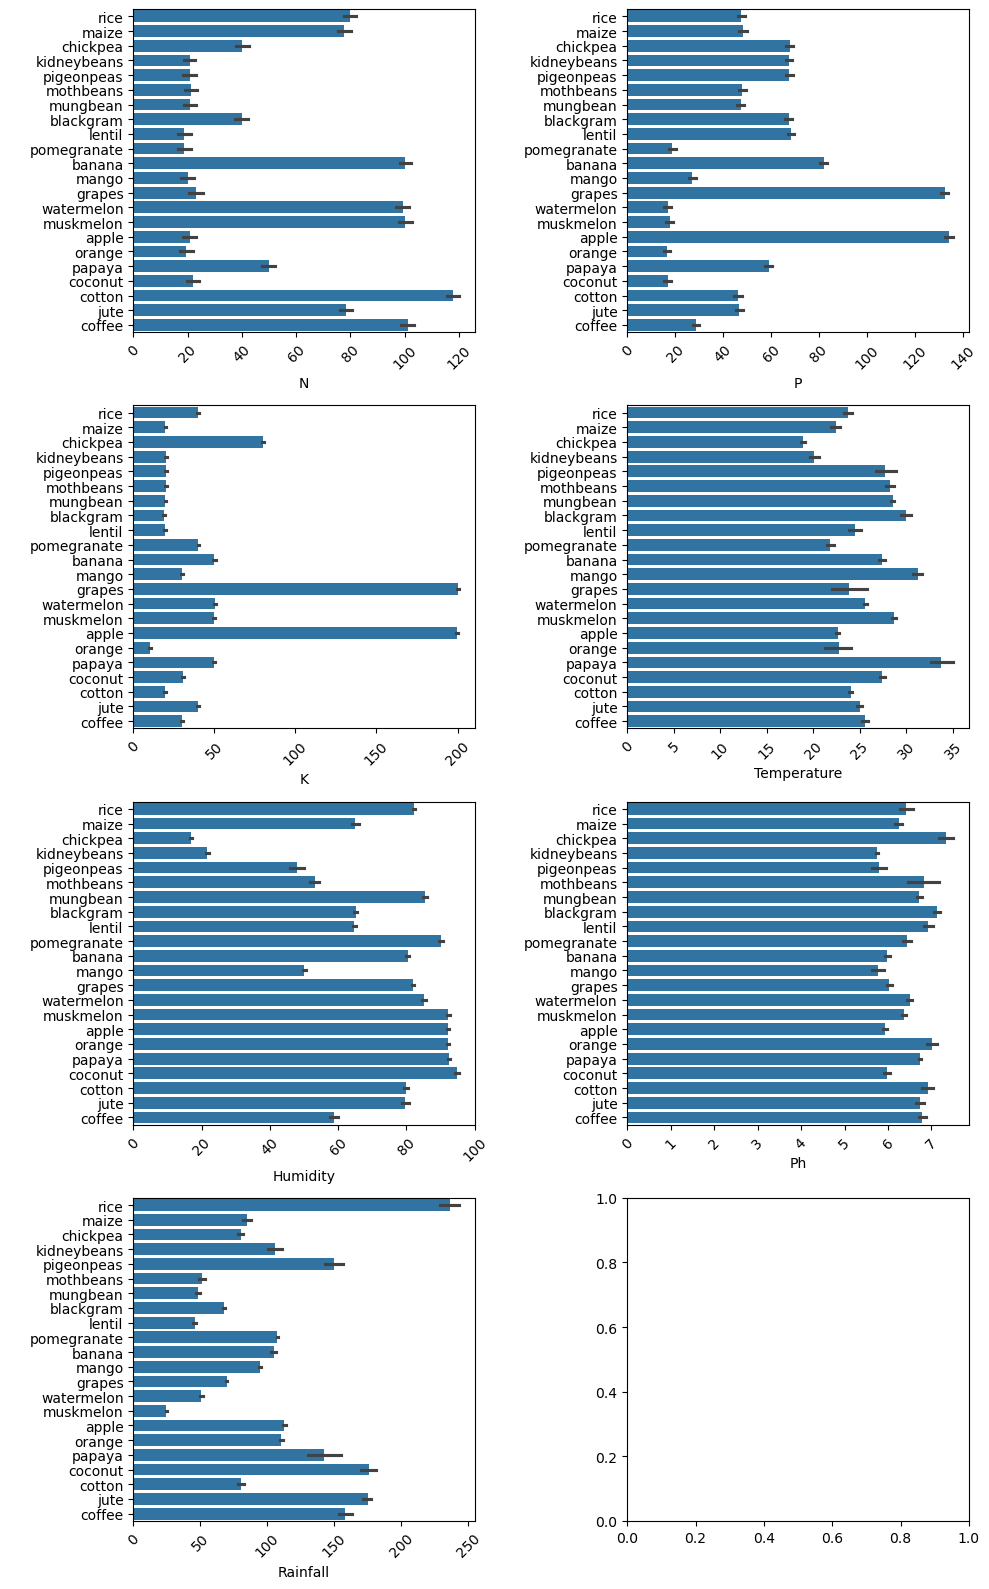

In [13]:
num_features = len(features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows*4))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.barplot(x=data[feature], y=data['label'], ax=axes[row, col])
    axes[row, col].set_ylabel(' ')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [14]:
#Determine Optimum number of cluster by elbow method
from sklearn.cluster import KMeans

x=data.drop(['label'],axis=1)
x=x.values
print(x.shape)

(2200, 7)


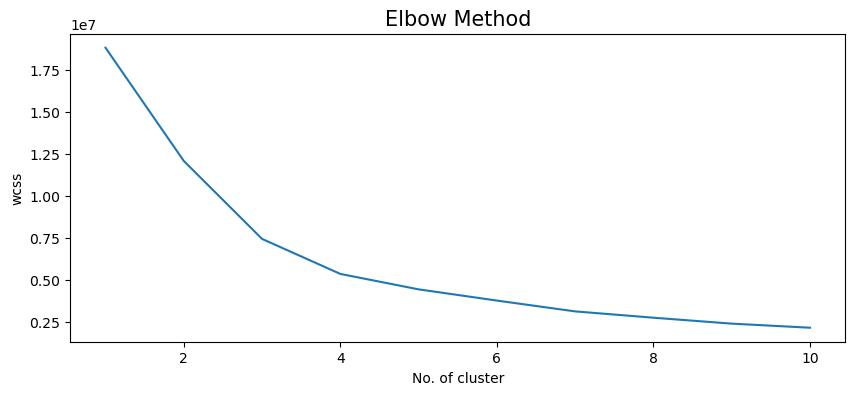

In [15]:
plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()
     


In [16]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})

In [17]:
for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------------------------')
     

Crops is cluster 0 ['grapes' 'apple']
---------------------------------------------------------------------------------------
Crops is cluster 1 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------------------
Crops is cluster 2 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------------------------


In [18]:
y=data['label']
x=data.drop(['label'],axis=1)

print('shape of x',x.shape)
print('shape of y',y.shape)
     

shape of x (2200, 7)
shape of y (2200,)


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (1760, 7)
Shape of x_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

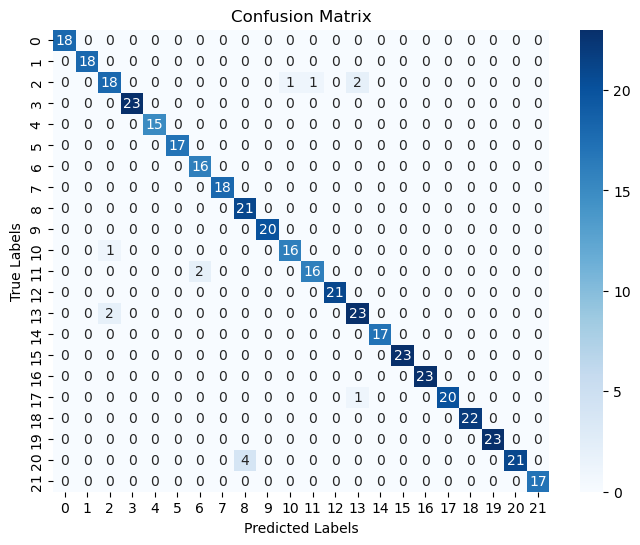

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer,classification_report

conf_matrix = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
     

In [22]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [23]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [54]:
prediction=model.predict((np.array([[20,140,40,20,80,700 ,200]])))
print("The suggested crop for given climatic condition is",prediction)
     

The suggested crop for given climatic condition is ['mothbeans']
